## Projeto - Análise de dados de ações

#### Leitura de dados com yfinance

https://pypi.org/project/yfinance/

In [92]:
#!pip3 install yfinance

In [93]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Ibovespa
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

In [94]:
df_ibov = pd.read_csv("ibovdia_09-08-22.csv")
df_ibov

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,200.372.163,"0,341"
1,ALPA4,ALPARGATAS,PN N1,201.257.220,"0,193"
2,ABEV3,AMBEV S/A,ON,4.380.195.841,"3,214"
3,AMER3,AMERICANAS,ON NM,596.875.824,"0,421"
4,ASAI3,ASSAI,ON NM,794.531.367,"0,682"
...,...,...,...,...,...
85,VALE3,VALE,ON NM,3.768.748.489,"12,817"
86,VIIA3,VIA,ON NM,1.596.295.753,"0,231"
87,VBBR3,VIBRA,ON NM,1.131.883.365,"1,016"
88,WEGE3,WEG,ON NM,1.484.859.030,"2,189"


#### 1. Vamos analisar o histórico das 10 ações com maior participacão na bolsa. Encontre estes ativos no DataFrame `df_ibov` e carregue-os em um objeto Tickers do módulo do Yahoo.

In [95]:
acoes = df_ibov.sort_values("Part. (%)").tail(10)["Código"].values

In [97]:
string_acoes = " ".join([i + ".SA" for i in acoes])

In [98]:
tickers = yf.Tickers(string_acoes)

In [99]:
tickers.tickers

{'WEGE3.SA': yfinance.Ticker object <WEGE3.SA>,
 'RENT3.SA': yfinance.Ticker object <RENT3.SA>,
 'ELET3.SA': yfinance.Ticker object <ELET3.SA>,
 'BBAS3.SA': yfinance.Ticker object <BBAS3.SA>,
 'ABEV3.SA': yfinance.Ticker object <ABEV3.SA>,
 'B3SA3.SA': yfinance.Ticker object <B3SA3.SA>,
 'BBDC4.SA': yfinance.Ticker object <BBDC4.SA>,
 'PETR3.SA': yfinance.Ticker object <PETR3.SA>,
 'ITUB4.SA': yfinance.Ticker object <ITUB4.SA>,
 'PETR4.SA': yfinance.Ticker object <PETR4.SA>}

#### 2. Crie um dicionário que conterá como chaves os tickers de cada ativo (PETR4.SA, por exemplo) e como valores um DataFrame contendo os dados históricos de cada 

In [100]:
dict_data = {}

for ticker in tickers.tickers.keys():
    print("Baixando dados da {}".format(ticker))
    dict_data[ticker] = tickers.tickers[ticker].history(period="max")

Baixando dados da WEGE3.SA
Baixando dados da RENT3.SA
Baixando dados da ELET3.SA
Baixando dados da BBAS3.SA
Baixando dados da ABEV3.SA
Baixando dados da B3SA3.SA
Baixando dados da BBDC4.SA
Baixando dados da PETR3.SA
Baixando dados da ITUB4.SA
Baixando dados da PETR4.SA


#### 3. Combine todos os dados em um único DataFrame, utilizando o preço de fechamento de cada ativo.

In [101]:
df_data = pd.DataFrame()
for ticker in dict_data.keys():
    dict_data[ticker] = dict_data[ticker].rename(columns={"Close": ticker})
    df_data = df_data.join(dict_data[ticker][ticker], how="outer")

In [102]:
df_data

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
Date,,,,,,,,,,
2000-01-03,0.124021,NaN,8.437323,1.168481,NaN,NaN,NaN,2.078387,NaN,2.139588
2000-01-04,0.119668,NaN,8.029410,1.112908,NaN,NaN,NaN,1.961743,NaN,2.021228
2000-01-05,0.119668,NaN,8.351446,1.124307,0.321626,NaN,NaN,1.988253,NaN,2.000834
2000-01-06,0.108789,NaN,8.158227,1.139981,0.305322,NaN,NaN,1.972348,NaN,1.993913
2000-01-07,0.108789,NaN,8.287041,1.114333,0.305322,NaN,NaN,1.988253,NaN,2.003018
...,...,...,...,...,...,...,...,...,...,...
2022-10-14,32.860001,64.599998,43.900002,39.160000,14.830000,13.89,19.690001,37.150002,28.650000,33.419998
2022-10-17,33.610001,66.300003,46.049999,39.490002,14.920000,14.15,19.830000,36.910000,28.879999,33.389999
2022-10-18,34.560001,67.580002,47.020000,39.950001,14.900000,14.00,19.980000,37.740002,29.590000,34.209999


#### 4. Qual a primeira data na qual todos os ativos estudados já estavam na bolsa?

In [103]:
df_data.dropna().index[0]

Timestamp('2008-01-02 00:00:00')

#### 5. Crie um DataFrame adicional para representar a variação percentual diária de cada ativo

In [104]:
df_ret = df_data / df_data.shift(1) - 1

#### 6. Quais foram as datas na qual cada ativo apresentou sua pior oscilação? Apresente também a variação percentual.

In [105]:
df_ret.idxmin()

WEGE3.SA   2020-03-16
RENT3.SA   2020-03-16
ELET3.SA   2010-02-01
BBAS3.SA   2016-03-15
ABEV3.SA   2005-04-04
B3SA3.SA   2011-05-09
BBDC4.SA   2009-05-29
PETR3.SA   2020-03-09
ITUB4.SA   2021-10-04
PETR4.SA   2020-03-09
dtype: datetime64[ns]

In [106]:
df_ret.min()

WEGE3.SA   -0.206197
RENT3.SA   -0.234219
ELET3.SA   -0.220074
BBAS3.SA   -0.211712
ABEV3.SA   -0.224262
B3SA3.SA   -0.661336
BBDC4.SA   -0.432508
PETR3.SA   -0.296758
ITUB4.SA   -0.179643
PETR4.SA   -0.296978
dtype: float64

#### 7. Analisando esta série temporal, você conseguira estimar avaliar se existe uma maior probabilidade maior dos ativos performarem bem logo após um dia de queda?

In [107]:
acoes

array(['WEGE3', 'RENT3', 'ELET3', 'BBAS3', 'ABEV3', 'B3SA3', 'BBDC4',
       'PETR3', 'ITUB4', 'PETR4'], dtype=object)

In [108]:
df_ret[df_ret.shift(1) < 0].mean()

WEGE3.SA    0.001241
RENT3.SA    0.001484
ELET3.SA   -0.000024
BBAS3.SA    0.000414
ABEV3.SA    0.001098
B3SA3.SA    0.001361
BBDC4.SA    0.001021
PETR3.SA    0.000383
ITUB4.SA    0.000450
PETR4.SA    0.000585
dtype: float64

In [109]:
df_ret[df_ret.shift(1) < 0].std()

WEGE3.SA    0.022098
RENT3.SA    0.027862
ELET3.SA    0.031524
BBAS3.SA    0.028635
ABEV3.SA    0.018776
B3SA3.SA    0.029016
BBDC4.SA    0.024724
PETR3.SA    0.029566
ITUB4.SA    0.023383
PETR4.SA    0.028806
dtype: float64

Média dos retornos
WEGE3 - 0.12405291272443637
RENT3 - 0.14835453155440337
ELET3 - -0.0023740832463365583
BBAS3 - 0.04139980365320172
ABEV3 - 0.10984765120547915
B3SA3 - 0.13614129416647236
BBDC4 - 0.10209545407944441
PETR3 - 0.03825663170136969
ITUB4 - 0.04499330374825174
PETR4 - 0.058475541593575125

Desvio padrão dos retornos
WEGE3 - 2.2097849069468745
RENT3 - 2.7861952740494096
ELET3 - 3.1524185562008076
BBAS3 - 2.8634552251178955
ABEV3 - 1.8776275621239082
B3SA3 - 2.9016416367717794
BBDC4 - 2.4723521282822474
PETR3 - 2.956586245282393
ITUB4 - 2.338308175388405
PETR4 - 2.8806386273270883


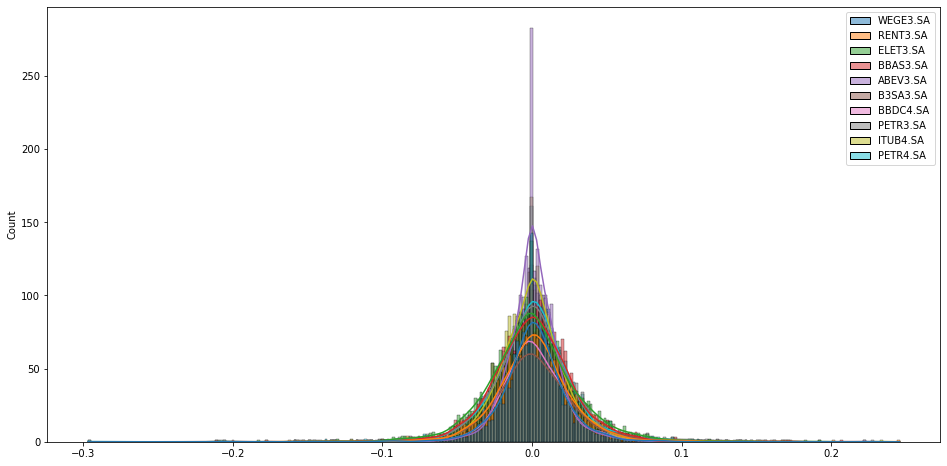

In [110]:
df_study = df_ret[df_ret.shift(1) < 0]

fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(df_study, kde=True)

print("Média dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].mean()*100))
print("")

print("Desvio padrão dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].std()*100))

#### 8. Seguindo a lógica da questão anterior, avalie como em média se comportam as ações no pregão seguinte a quedas maiores que 1%. De posse destes dados, você acredita que seria uma boa estratégia de investimento comprar ações que cairam no dia anterior?

Média dos retornos
WEGE3 - 0.1638269059979584
RENT3 - 0.158179648685212
ELET3 - 0.014807385765476291
BBAS3 - 0.08633381717640151
ABEV3 - 0.20201740135226048
B3SA3 - 0.13893361590875447
BBDC4 - 0.16520876844239366
PETR3 - 0.0003143022541573147
ITUB4 - 0.05678184202753487
PETR4 - 0.026975412662088128

Desvio padrão dos retornos
WEGE3 - 2.3726226039916933
RENT3 - 3.0231877023089413
ELET3 - 3.3640617190041002
BBAS3 - 3.126091230388237
ABEV3 - 2.1564716796398002
B3SA3 - 3.2211639236181187
BBDC4 - 2.7794864900194494
PETR3 - 3.147187464356169
ITUB4 - 2.5601577820426478
PETR4 - 3.0847354911925975


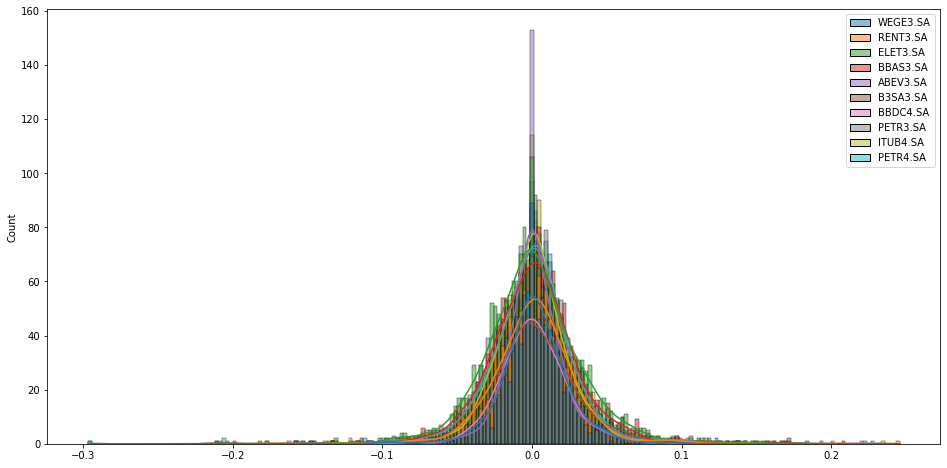

In [111]:
df_study = df_ret[df_ret.shift(1) < -0.01]

fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(df_study, kde=True)

print("Média dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].mean()*100))
print("")

print("Desvio padrão dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].std()*100))

## DESAFIOS

#### 9. De tempos em tempos, empresas podem distribuir lucro aos acionistas na forma de dividendos. Podemos obter o histórico de pagamentos de dividendos usando a yfinance. Um indicador muito utilizado no mercado é o Dividend Yield (DY), que é calculado somando-se o total pago de dividendos no ano e dividindo pela cotação da ação. Calcule o DY anual de cada ativo.

In [112]:
df_dividends = pd.DataFrame()

for ticker in tickers.tickers.keys():
    df_dividends_aux = tickers.tickers[ticker].dividends.to_frame().rename(columns={"Dividends": ticker})        
    df_dividends = df_dividends.join(df_dividends_aux, how="outer")

In [113]:
df_dividends["year"] = df_dividends.index.year
df_data["year"] = df_data.index.year

In [114]:
df_data.dropna().groupby("year").last()

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,1.388062,1.442652,11.298151,6.275602,2.156922,3.677140,8.315359,12.457290,6.592063,9.353353
2009,2.098787,3.863669,16.797285,12.793221,3.951600,7.571979,7.752972,19.350567,10.749111,15.525704
2010,2.534457,5.584912,11.308919,14.760997,5.818732,8.220411,7.159645,14.588740,11.143833,11.891821
2011,2.249078,5.386007,9.462292,11.946263,7.521211,2.121730,6.982923,11.360951,10.022729,9.726126
2012,3.314336,7.981805,3.657323,13.821529,11.951905,3.144134,8.225518,9.876195,10.178351,9.045576
2013,3.922831,8.803853,4.420463,14.567734,12.556190,2.633690,7.705928,8.134791,11.118356,8.067443
2014,5.117613,9.554008,4.612569,15.176923,12.251677,2.429290,9.661405,5.058872,13.619006,5.051495
2015,5.134766,6.820761,4.580759,10.397449,14.749537,2.876802,6.774434,4.520807,11.984608,3.374378
2016,5.460157,9.672205,18.140123,20.733652,14.045370,4.495625,11.767251,8.936110,17.973032,7.489107


In [115]:
df_dividends_year = df_dividends.groupby("year").sum()
df_last_price = df_data.dropna().groupby("year").last()

In [116]:
df_last_price

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,1.388062,1.442652,11.298151,6.275602,2.156922,3.677140,8.315359,12.457290,6.592063,9.353353
2009,2.098787,3.863669,16.797285,12.793221,3.951600,7.571979,7.752972,19.350567,10.749111,15.525704
2010,2.534457,5.584912,11.308919,14.760997,5.818732,8.220411,7.159645,14.588740,11.143833,11.891821
2011,2.249078,5.386007,9.462292,11.946263,7.521211,2.121730,6.982923,11.360951,10.022729,9.726126
2012,3.314336,7.981805,3.657323,13.821529,11.951905,3.144134,8.225518,9.876195,10.178351,9.045576
2013,3.922831,8.803853,4.420463,14.567734,12.556190,2.633690,7.705928,8.134791,11.118356,8.067443
2014,5.117613,9.554008,4.612569,15.176923,12.251677,2.429290,9.661405,5.058872,13.619006,5.051495
2015,5.134766,6.820761,4.580759,10.397449,14.749537,2.876802,6.774434,4.520807,11.984608,3.374378
2016,5.460157,9.672205,18.140123,20.733652,14.045370,4.495625,11.767251,8.936110,17.973032,7.489107


In [117]:
df_dividends_year

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383951
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.892450
2007,0.000000,0.010639,0.000000,0.000000,0.016302,0.000000,0.000000,0.000000,0.000000,0.908200
2008,0.054881,0.116438,0.415780,0.000000,0.097491,0.024332,0.413529,0.042600,0.000000,0.300500
2009,0.058580,0.044964,1.547656,0.868431,0.163877,0.110237,0.278886,1.051600,0.000000,1.051600
2010,0.043934,0.046522,3.600252,1.786777,0.117310,0.156855,0.281986,0.782085,0.139118,0.813200
2011,0.084231,0.101151,0.877025,1.857252,0.217601,0.174123,0.382360,0.909020,0.807866,0.920820
2012,0.073076,0.123764,1.279561,1.625820,0.476664,0.134854,0.353056,0.501700,0.523552,0.501700
2013,0.100130,1.639256,1.422070,2.376982,0.257176,0.248824,0.336835,0.134310,0.501785,0.386170


In [118]:
df_yield = df_dividends_year/df_last_price  * 100
df_yield.dropna(inplace=True)

In [119]:
df_yield

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,3.953787,8.071105,3.680071,0.000000,4.519913,0.661710,4.973074,0.341968,0.000000,3.212752
2009,2.791136,1.163764,9.213727,6.788212,4.147105,1.455855,3.597150,5.434466,0.000000,6.773284
2010,1.733468,0.832994,31.835510,12.104718,2.016075,1.908116,3.938547,5.360881,1.248386,6.838314
2011,3.745135,1.878033,9.268632,15.546719,2.893164,8.206651,5.475644,8.001266,8.060340,9.467490
2012,2.204846,1.550577,34.986272,11.762953,3.988184,4.289067,4.292204,5.079892,5.143780,5.546358
2013,2.552493,18.619757,32.170162,16.316759,2.048201,9.447734,4.371115,1.651056,4.513122,4.786771
2014,2.408174,1.523465,8.937579,10.937790,4.848153,5.546271,5.263676,10.636363,3.937828,19.146807
2015,2.923911,2.959083,0.000000,19.828297,10.712201,9.259030,9.626679,0.000000,7.550068,0.000000
2016,2.649228,2.794285,0.000000,4.406898,4.556662,3.733786,5.809658,0.000000,5.917761,0.000000


#### 10. Avalie o desempenho de uma estratégia de investimento que monta uma carteira de ações ano a ano com as 3 maiores pagadoras de dividendo do ano anterior. Compare o desempenho dela com o desempenho de uma carteira global.

In [120]:
df_ret_year = df_last_price / df_last_price.shift(1) - 1 

In [121]:
df_ret_year.columns.shape[0]
df_ret_year

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.512027,1.678170,0.486729,1.038565,0.832055,1.059203,-0.067632,0.553353,0.630614,0.659908
2010,0.207582,0.445494,-0.326741,0.153814,0.472500,0.085636,-0.076529,-0.246082,0.036721,-0.234056
2011,-0.112600,-0.035615,-0.163289,-0.190687,0.292586,-0.741895,-0.024683,-0.221252,-0.100603,-0.182116
2012,0.473642,0.481952,-0.613484,0.156975,0.589093,0.481872,0.177948,-0.130689,0.015527,-0.069971
2013,0.183595,0.102990,0.208661,0.053989,0.050560,-0.162348,-0.063168,-0.176323,0.092353,-0.108134
2014,0.304571,0.085208,0.043458,0.041818,-0.024252,-0.077610,0.253763,-0.378119,0.224912,-0.373842
2015,0.003352,-0.286084,-0.006896,-0.314917,0.203879,0.184215,-0.298815,-0.106361,-0.120009,-0.332004
2016,0.063370,0.418054,2.960069,0.994110,-0.047742,0.562716,0.737009,0.976663,0.499676,1.219404


In [122]:
strategy_return = []

for i in range(len(df_yield) - 1):
    stocks = df_yield.iloc[i, :].nlargest(3).index    
    strategy_return += [(df_ret_year[stocks].iloc[i+1] / 3).sum() + 1]

<AxesSubplot:xlabel='year'>

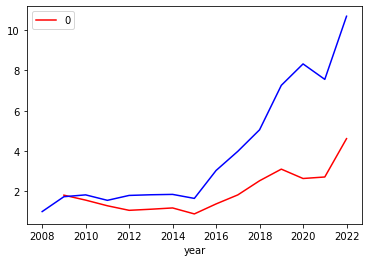

In [123]:
df_global = df_ret_year / 10

fig, ax = plt.subplots()
pd.DataFrame(strategy_return, index=df_global.index[1:]).cumprod().plot(color="red", ax=ax)
(df_global.sum(axis=1) + 1).cumprod().plot(color="blue", ax=ax)